# Predicting Newsletter Subscription with KNN Classification Using Age and Experience Level

Contributors:
- Emily Tu (90525254)
- Yifan Zuo (54090832)
- Darren Zeng (47515820)
- Ziheng Wang (54674528)

Github: https://github.com/dod0bird/Dsci-Group-Project

## Introduction
Video games are widely being used for the study of human behaviour and decision making. In this project we are using data obtained from a [MineCraft Server](https://plai.cs.ubc.ca), collected by [The Pacific Laboratory for Artificial Intelligence (PLAI)](https://plai.cs.ubc.ca), a research team at UBC. The team needs to target their recruitment efforts, and make sure they have enough resources (e.g., software licenses, server hardware) to handle the number of players they attract. 

The players who join the server give consent for their in-game activities to be recorded for research purposes and have the opportunity to subscribe to a game related newsletter. The research team wants to know who is subscribing to the newsletter as subscribed players are easier to contact for future follow-up studies, improving the effectiveness of participant recruitment, and subscription behaviour may reflect a player's level of engagement with the research project, since more invested players may be more willing to remain connected and contribute additional data over time.


## Question

#### Broad question
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

#### Specific question
The question we will be exploring is "Can a player's experience level and Age predict whether they subscribe to the newsletter, using the data based on the players dataset?"

We will use the `players.csv` dataset, which has 7 variables and 196 observations, describing general demographic information about each player logged on the server:

| Variable       | Description                             | Type                  |
| -------------- | --------------------------------------- | --------------------- |
| `experience`   | The player’s level of experience        | character              |
| `subscribe`    | The player’s subscription status to the game newsletter       | logical |
| `hashedEmail`  | The player’s unique identifier code     | character             |
| `played_hours` | The player’s total number of hours each player has played on the MineCraft server. | double             |
| `name`         | The player’s name                       | character             |
| `gender`       | The player’s reported gender                     | character             |
| `Age`          | The player’s age (in years)             | double              |


There are 2 quantitative variables, their calculated means are below:

| Mean Hours Played | Mean Age |
| -------- | ------- |
| 5.85  | 21.14    |



There are a few issues with the data:
- `experience`, `subscribe`, `gender`, are read in as the incorrect data type, they should be stored as categorical variables instead.
- `Age` should be an integer.
- Variables such as `experience` and `Age` are self-reported, which may introduce accuracies or inconsistencies.

To address our specific question, `subscribe` (TRUE/FALSE) is the response variable, while `experience` (Beginner, Amateur, Regular, Veteran, Pro) and `Age` (in years) are the predictors that may influence subscription behaviour. By modelling these relationships, we can potentially identify what types of players are more likely to subscribe based on their self-reported information.

We are observing the predictors `experience` and `Age`. A player's experience may reflect how comfortable or invested a player is in gaming. More experienced players might engage more consistently, feel more connected to the research environment, or be more willing to participate in follow-up studies. Age may influence play behaviour, availability, or motivation to engage with research content. Different age groups may show different subscription patterns depending on their interests or gaming habits.

## Methods and Results

We plan to use a K-Nearest Neighbors (KNN) classification model to predict whether a player will subscribe based on their age and experience. KNN classification is suitable for our sceneraio because we are predcting a categorical variable. This model is a simple, intuitive algorithm. There are no specific data or shape assumptions about the data for the algorithm to perform well. 

However there are a few potenital limitations of using KNN Classification:
- sensitive to the number of neighbors (K) and the scale of variables
- may perform poorly if the data is imbalanced
- may not perform well with a large number of predictors
- becomes very slow as the training data gets larger
- may not predict well beyond the range of values in the training data


##### Pre-Analysis Procedure:
1. Load the packages that are necessary.
2. Use the URL to load the players dataset.
3. Wrangle and clean the data:
   - Selecting the required columns and filtering out players with `played_hours` = 0, as these players may be inactive or may have registered for the game but never participated.
   - Remove any missing values because they may impact the calculations later on.
   - Convert variables to their appropriate types, (e.g. `experience` and `subscribe` to factor variables, and `Age` to integer).
4. Apply One-Hot Encoding to convert `experience` into a numeric variable so it can be used for classification.

##### Data Analysis Procedure:
1. Split and preprocess the dataset
   - Split the data into training and testing sets before modeling. Specifically, we will use 70% of the data for training and 30% for testing to evaluate model performance on unseen data.
   - Create a recipe to standardize the data and select predictors.
2. Set up the initial KNN model with a tunable neighbours parameter
3. Perform 5-Fold cross validation and tune K
    - Within the training data, 5-fold cross-validation will be applied to tune the value of K. In each fold, 80% of the training data will be used for training and 20% will be used as the validation set.
    - After running 5-fold cross-validation for each K value, we will look at the average accuracy of each model. The K value that produced the highest accuracy will be selected.
4. Train the final KNN model by using the optimal K value then fitting it onto the entire training set.
6. Evaluate the KNN final model performance by applying it on the test set then evaluating its performance using accuracy, precision, and recall.

## Pre-Analysis 

### 1. Load required libraries
Loading the required libraries to compute our analysis

In [28]:
library(tidyverse)
library(tidymodels)
library(kknn)

### 2. Load data
Reading the player dataset from the GitHub URL

In [29]:
url = 'https://raw.githubusercontent.com/dod0bird/Dsci-Group-Project/refs/heads/main/players.csv'
players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### 3. Wrangling and cleaning the data 
Selecting the required columns, filtering out inactive players, then converting variables to their appropriate types and removing any observations with missing values

In [3]:
# select the required columns and filter out players with `played_hours` = 0
players_new <- players |> 
mutate(experience = as_factor(experience),
       subscribe = as_factor(subscribe),
       Age = as.integer(Age)) |>
filter(played_hours > 0) |>
select(c(1,2,7)) 

# remove the missing values
players_new <- players_new |>
drop_na()

head(players_new)

experience,subscribe,Age
<fct>,<fct>,<int>
Pro,TRUE,9
Veteran,TRUE,17
Amateur,TRUE,21
Regular,TRUE,21
Amateur,TRUE,47
Veteran,TRUE,23


#### Summary of data set after wrangling and cleaning
Viewing the levels of each categorical variable and calculating summary statistics

In [4]:
experience_categories <- players_new |>
    distinct(experience)
experience_categories

experience
<fct>
Pro
Veteran
Amateur
Regular
Beginner


In [5]:
subscribe_levels <- players_new |>
     group_by(subscribe) |>
    summarise(count = n())
subscribe_levels

subscribe,count
<fct>,<int>
FALSE,25
TRUE,84


In [6]:
subscribe_ratio <- 84 / (84 + 25)
subscribe_ratio

[1] 0.7706422

The `TRUE` class (n = 84) significantly outnumbers the `FALSE` class (n = 25), indicating a noticeable class imbalance. It is also observed that 77.06% of players are subscribed to the newsletter.

In [7]:
# Calculate summary statistics for the Age variable(mean, min, max, SD)
age_summary <- players_new |>
  summarize(age_mean = mean(Age, na.rm = TRUE),
            age_min = min(Age, na.rm = TRUE),
            age_max = max(Age, na.rm = TRUE),
            age_sd = sd(Age, na.rm = TRUE))
age_summary

age_mean,age_min,age_max,age_sd
<dbl>,<int>,<int>,<dbl>
21.30275,9,58,7.652771


In [8]:
dim(players_new)

[1] 109   3

#### Players dataset overview after wrangling and cleaning:
- number of observations: 109
- number of variables: 3
  
Variables:
+ `experience` is a catagorical variable that records player's experience level in the game falling under `Pro`,`Veteran`, `Amateur`, `Regular`, or `Beginner`.
+ `subscribe` is a catagorical variable that indicates if the player is subscribed to a game-related newsletter, with `TRUE` meaning subscribed and `FALSE` meaning not subscribed.
+ `Age` is a integer variable that records the player's age in years. The mean age is 21.30 years old, with a minimum of 9 years old, a maximum of 58 years old, and a standard deviation of 7.65 years old.

### 4. Applying One-Hot Encoding 
Using one-hot encoding to convert `experience` from a categorical variable to a numerical variable. These transformations ensure that `experience` will be in a suitable format for the subsequent classification modeling process.

In [9]:
# Apply One-Hot Encoding to convert experience into a numeric variable
encoded_experience <- model.matrix(~ experience - 1, data = players_new)

# Combine Age, subscribe, and the one-hot encoded experience variables
players_encoded <- players_new |>
  select(Age, subscribe, experience) |> 
  bind_cols(as_tibble(encoded_experience)) 
head(players_encoded)

Age,subscribe,experience,experiencePro,experienceVeteran,experienceAmateur,experienceRegular,experienceBeginner
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,TRUE,Pro,1,0,0,0,0
17,TRUE,Veteran,0,1,0,0,0
21,TRUE,Amateur,0,0,1,0,0
21,TRUE,Regular,0,0,0,1,0
47,TRUE,Amateur,0,0,1,0,0
23,TRUE,Veteran,0,1,0,0,0


#### The variables in players dataset after encoding are:
+ `experienceAmateur`, `experienceBeginner`, `experiencePro`, `experienceRegular`, and `experienceVeteran` are double variables. Each variable takes a value of 0 or 1, indicating whether the player's experience level is Amateur, Beginner, Pro, Regular, or Veteran respectively. 
+ `subscribe` is a factor variable now.
+ `Age` is an integer variable that records the player's age in years.
+ `experience` is a factor variable that records player's experience level in the game, such as `Pro`,`Veteran`, `Amateur`, `Regular`, and `Beginner`.

## Exploratory Data Analysis and Visualization

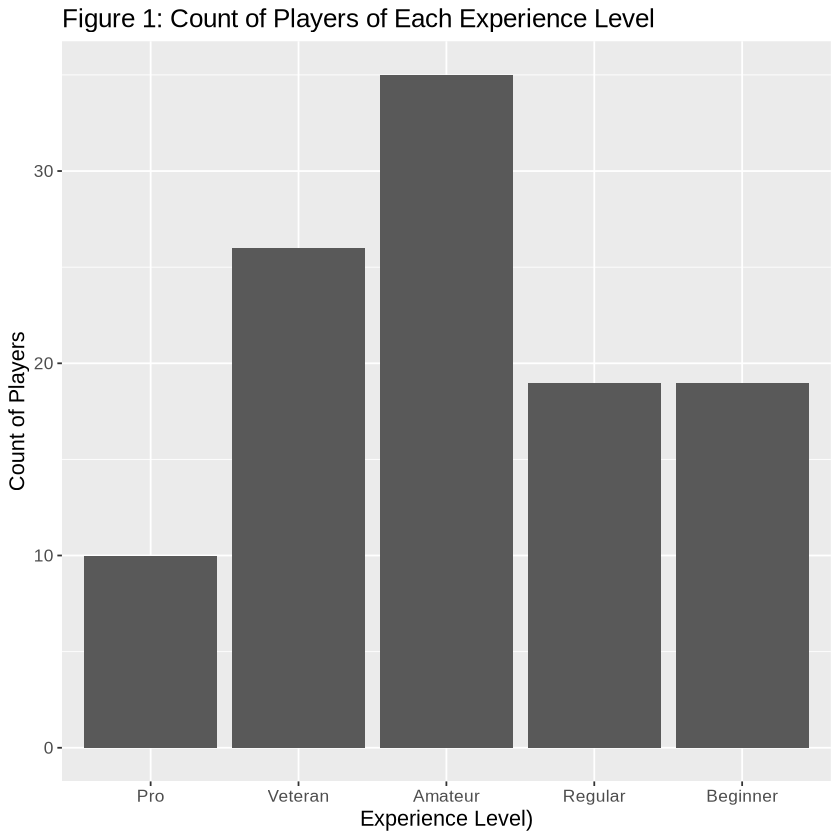

In [10]:
age_distribution <- players_new |>
  ggplot(aes(x = experience)) +
  geom_bar(stat = "count") +
  xlab("Experience Level)") + ylab("Count of Players") +
  ggtitle("Figure 1: Count of Players of Each Experience Level") +
  theme(text = element_text(size=13))
age_distribution

Figure 1 displays the distribution of players experience in the dataset. It shows that the majority of players are Amateur or Veteran, while fewer players are at the Beginner, Veteran, or Pro levels.

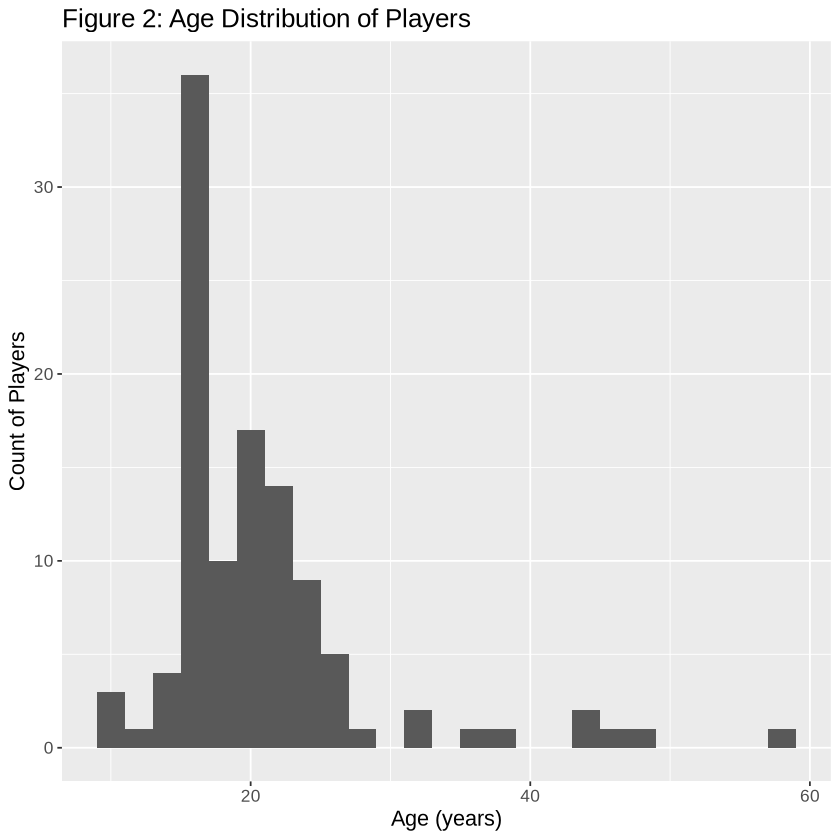

In [11]:
age_distribution <- players_new |>
  ggplot(aes(x = Age)) +
  geom_histogram(binwidth = 2) +
  xlab("Age (years)") + ylab("Count of Players") +
  ggtitle("Figure 2: Age Distribution of Players") +
  theme(text = element_text(size=13))
age_distribution

Figure 2 shows the distribution of player ages. We can observe that most players fall between 15 and 20 years old and there are few players under 15 and over 30, indicating that the age distribution is heavily skewed towards younger players.

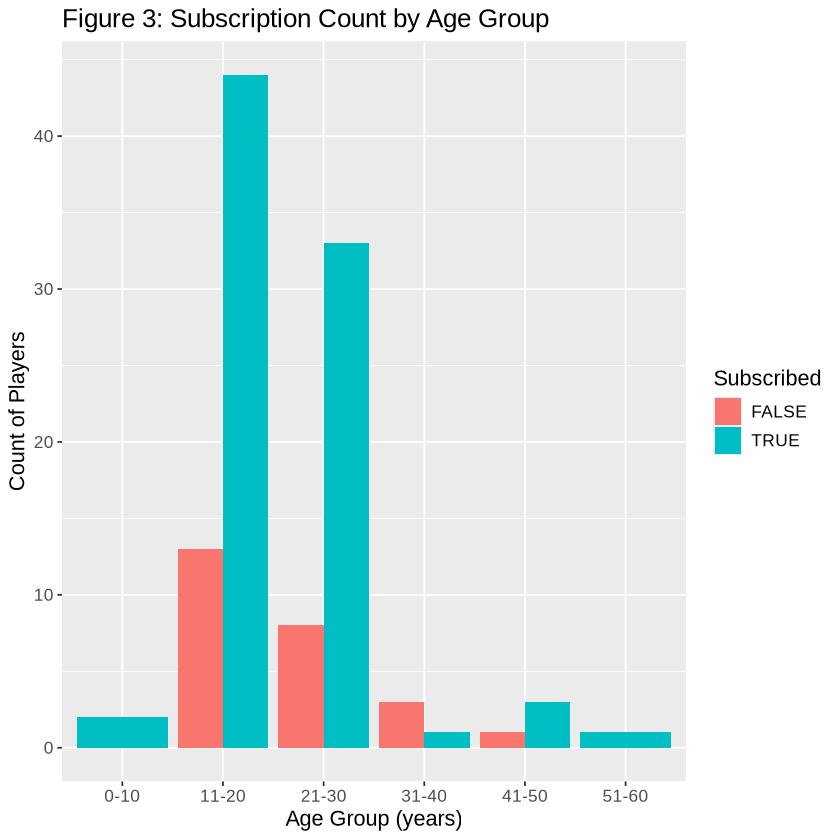

In [12]:
age_subscribe_bar <- players_new |>
  mutate(age_group = cut(Age, breaks = c(0, 10, 20, 30, 40, 50, 60),
                         labels = c("0-10", "11-20", "21-30", "31-40", "41-50", "51-60"))) |>
  ggplot(aes(x = age_group, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(x = "Age Group (years)", y = "Count of Players",
       fill = "Subscribed",
       title = "Figure 3: Subscription Count by Age Group")+
  theme(text = element_text(size=13))

age_subscribe_bar

Figure 3 compares subscription rates across age groups. It is observed that players between 11 and 30 years old subscribe the most compared to other age groups. This trend may be a reflection that most players in our dataset (and therefore most subscribers) are within that age range.

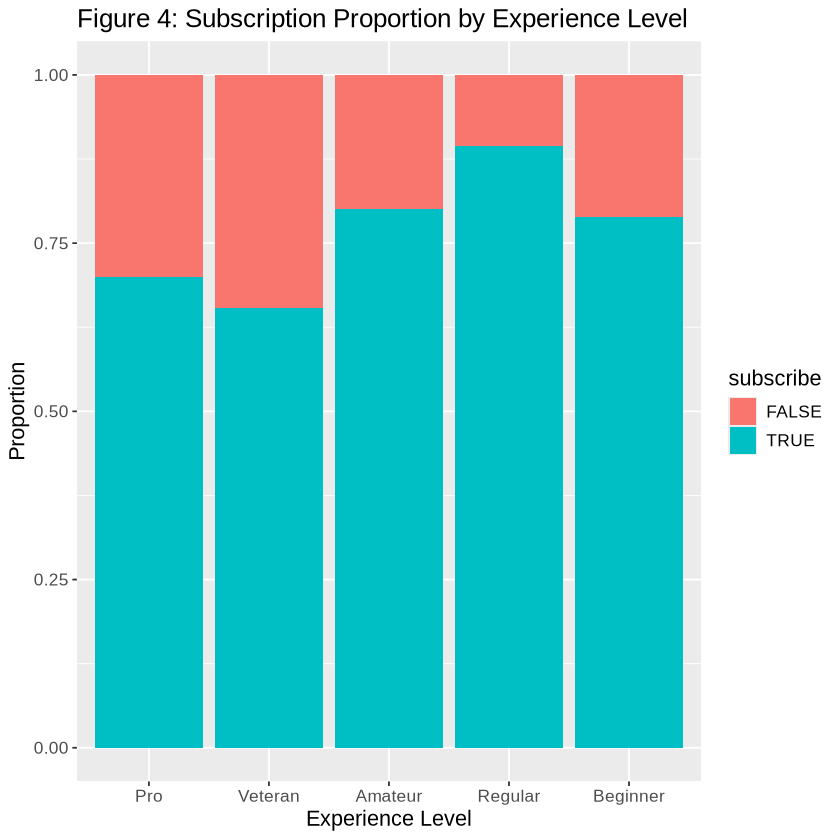

In [13]:
subscribe_experience_prop <- players_new |>
  ggplot(aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  xlab("Experience Level") +
  ylab("Proportion") +
  ggtitle("Figure 4: Subscription Proportion by Experience Level") +
  theme(text = element_text(size=13))
subscribe_experience_prop

Figure 4 shows the proportion of subscription status across experience levels. It can be seen that players at the Regular level have the highest subscription rate, but the subscription rates do not vary by a drastic amount across levels.

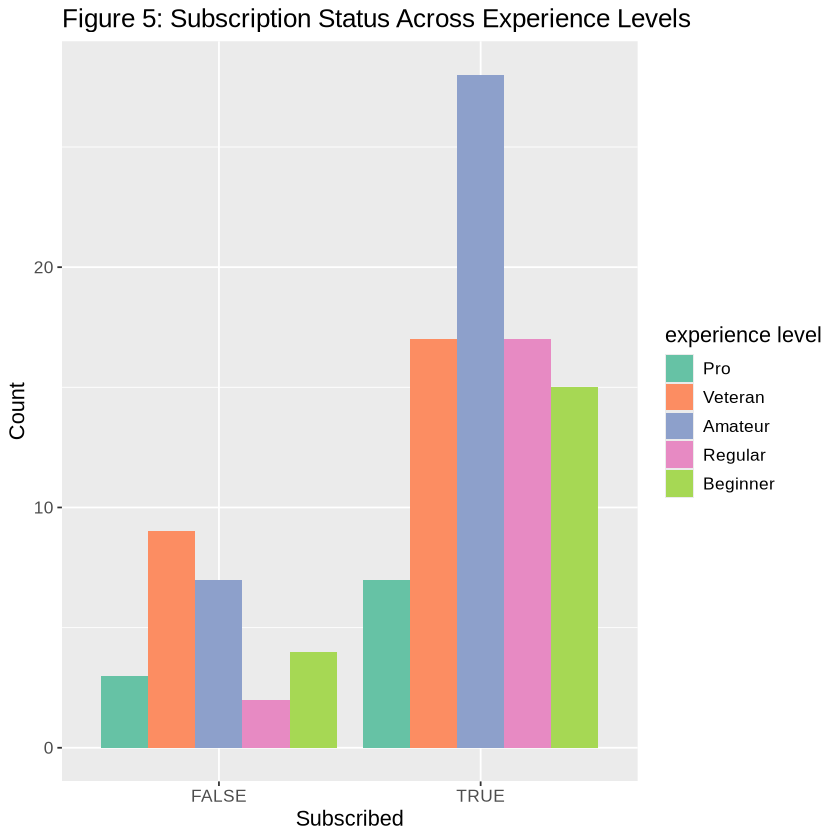

In [14]:
subscribe_experience <- ggplot(players_new, aes(x = subscribe)) + 
  geom_bar(aes(fill = experience), position = "dodge") +
  xlab("Subscribed") +
  ylab("Count") +
  scale_fill_brewer(palette = "Set2") +
  ggtitle("Figure 5: Subscription Status Across Experience Levels") +
  labs(fill = "experience level") +
  theme(text = element_text(size=13))
subscribe_experience

Figure 5 compares subscription levels across different experience levels. It is observed that experienced players (Veteran and Regular) have higher subscription proportions than Beginner and Pro players. It also shows that Amateur players make up most of the subscribers.

### Observations
From our exploratory analyses, we can see noticeable imbalances throughout our dataset. There are many more players who are subscribed than those who are not, many more Amateur players than other experience levels, and a higher concentration of younger players. The class imbalance in subscription status may affect the results of our model, considering K-NN classification is especially sensitive to class imbalance as its algorithm depends on nearby data points. Since there are certain kinds of players who are less common in the dataset, our model may not make accurate predictions for these groups outside of the dataset.

## Data analysis

### 1. Split and preprocess data

In [15]:
# splitting the data into training and testing set, using a 70-30 train-test split
set.seed(7654)
players_split <- initial_split(players_encoded, prop = 0.70, strata = subscribe)
players_train <- training(players_split)
players_test  <- testing(players_split)

In [16]:
# creating the recipe, preparing and preprocessing the data (normalization & selecting predictors)
players_recipe <- recipe(subscribe ~ Age + experienceAmateur + experienceBeginner + experiencePro + experienceRegular + experienceVeteran, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) 

players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 6



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



### 2. Set up KNN Model 

In [17]:
# Specify KNN clssification model with tunable neighbors
players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
players_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [18]:
# Define candidate K values
players_kvalues <- tibble(neighbors = 1:20)

### 3. Perform 5-Fold Cross-Validation and Tune K

In [19]:
# Set up 5-fold cross-validation on training data
set.seed(7654)
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

In [20]:
# Create workflow and tune K using cross-validation
players_fit_tune <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_tune) |>
  tune_grid(resamples = players_vfold, grid = players_kvalues, control = control_grid(save_pred = TRUE))

In [21]:
# Collect accuracy results and identify best K
players_accuracy <- players_fit_tune |>
  collect_metrics() |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean))
head(players_accuracy)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,binary,0.7742857,5,0.03171642,Preprocessor1_Model06
9,accuracy,binary,0.7742857,5,0.01025193,Preprocessor1_Model09
10,accuracy,binary,0.7742857,5,0.01025193,Preprocessor1_Model10
13,accuracy,binary,0.7742857,5,0.01025193,Preprocessor1_Model13
14,accuracy,binary,0.7742857,5,0.01025193,Preprocessor1_Model14
15,accuracy,binary,0.7742857,5,0.01025193,Preprocessor1_Model15


In [22]:
# See accuracy stats with best K
best_kvalue_metrics <- players_accuracy |>
slice(1) 
best_kvalue_metrics

# Select the best K value based on accuracy
best_kvalue <- players_accuracy |>
slice(1) |> 
pull(neighbors)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,binary,0.7742857,5,0.03171642,Preprocessor1_Model06


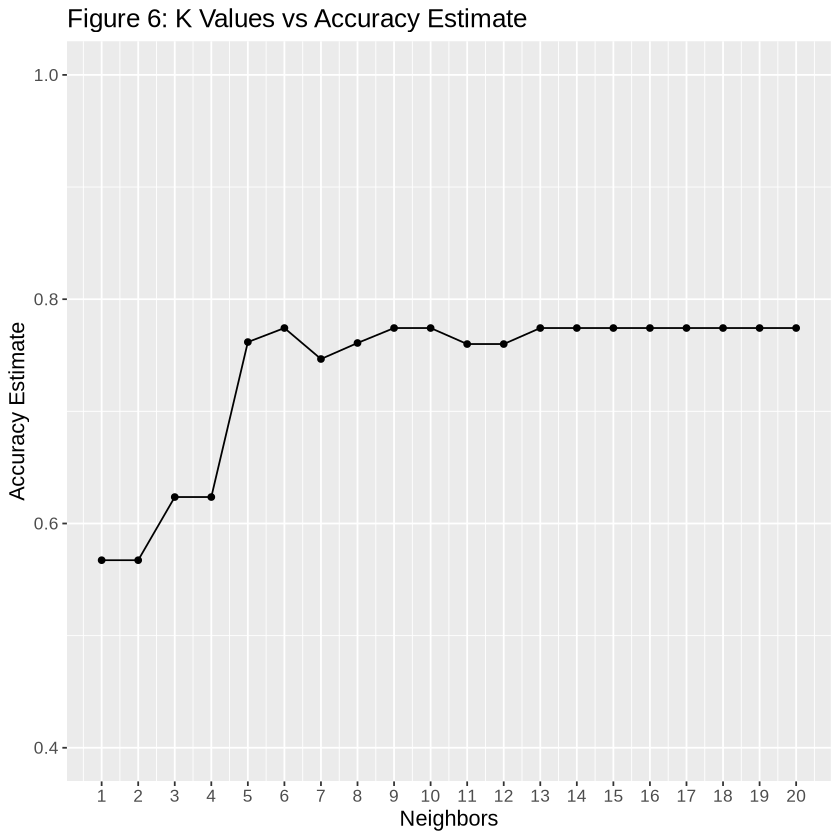

In [23]:
# Plot K values tested vs Accuracy
accuracy_versus_k <- ggplot(players_accuracy, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      ggtitle("Figure 6: K Values vs Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 20, by = 1)) +  
      scale_y_continuous(limits = c(0.4, 1.0)) +
      theme(text = element_text(size=13))
accuracy_versus_k

Figure 6 displays the relationship between the number of neighbors (K) and the model’s estimated accuracy. We can observe that the model's accuracy peaks at K = 6. It is interesting to note that after K values of 13, the accuracy plateaus to the same level as the peak. This plateau is likely due to large K values underfitting the data. Additionally, the predictors have quite limited variations, as experience has only five discrete levels and age is concentrated in a narrow range meaning adding more neighbours does not provide any additional information, causing the model’s accuracy to stabalize. 

### 4. Train the Final Model Using the Optimal K

In [24]:
# Train final KNN model using the best K
players_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_kvalue) |>
  set_engine("kknn") |>
  set_mode("classification")

players_workflow <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_final_spec)

players_fit <- fit(players_workflow, data = players_train)

### 5. Evaluate Final Model Performance

In [25]:
# Evaluate final KNN classification model
players_predictions <- predict(players_fit, players_test) |>
  bind_cols(players_test)

# Accuracy
players_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

# Precision
players_predictions |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "second")

# Recall
players_predictions |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "second")

players_confusion <- players_predictions |>
  conf_mat(truth = subscribe, estimate = .pred_class)
players_confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7058824


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.8076923


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.8076923


          Truth
Prediction FALSE TRUE
     FALSE     3    5
     TRUE      5   21

#### Confusion Matrix

|       | Actually Unsubscribed| Actually Subscribed |
| -------- | ------- |-------|
| Predicted Unsubscribed | 3  |  5 |
| Predicted Subscribed| 5  | 21 |

As shown in the confusion matrix, the model correctly predicted 3 non-subscribers and 21 subscribers. It misclassified 5 non-subscribers as subscribers (false positives). It also missed 5 actual subscribers by predicting them as non-subscribers (false negatives). Overall, the model tends to predict `TRUE` more often, likely due to the class imbalance in the `subscribe` variable, where the `TRUE` class appears much more frequently than the `FALSE` class. 

Despite the data imbalance, we get a precision and recall around 80.77%, indicating the model identifies most subscribers correctly. Our model's accuracy is 70.59%, meaning the model makes correct predictions about 70.59% of the time.

## Visualization of the analysis 

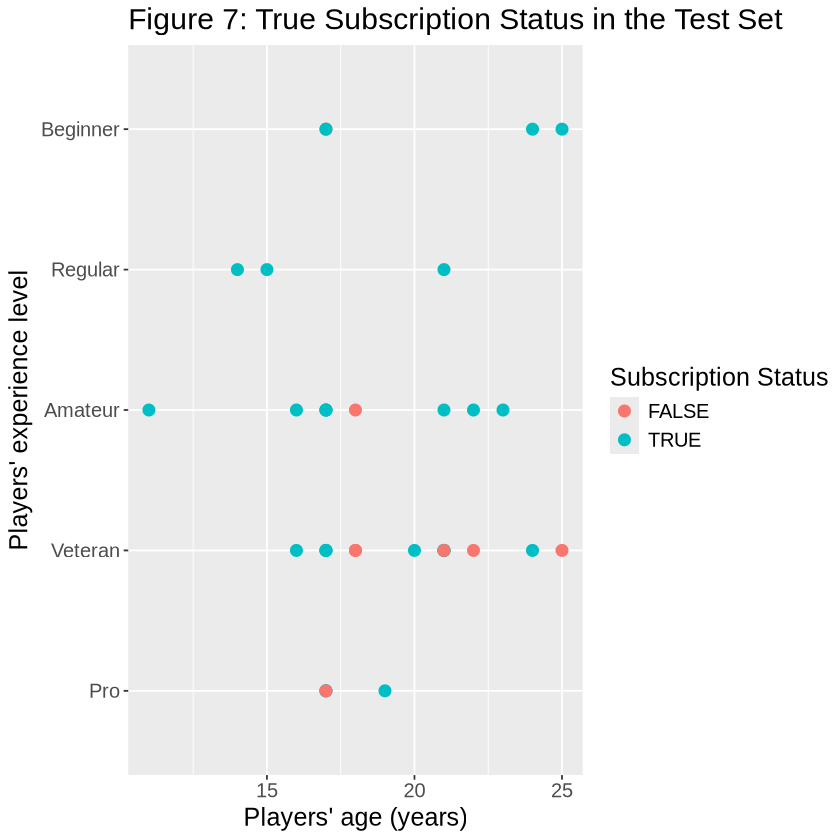

In [26]:
actual_subscribe <- ggplot(players_test, aes(x = Age, y = experience, color = subscribe)) +
  geom_point(size = 3) +
  labs(
    x = "Players' age (years)",
    y = "Players' experience level",
    title = "Figure 7: True Subscription Status in the Test Set",
    color = "Subscription Status") +
    theme(text = element_text(size = 15))
actual_subscribe

Figure 7 presents a scatter plot of the actual subscription status in the test set. Each data point represents an individual player, with color indicating their subscription status. The plot shows that subscribed players (`TRUE`) are noticeably more frequent than non-subscribed players (`FALSE`) across most age groups and experience levels, reflecting the class imbalance observed in the dataset.

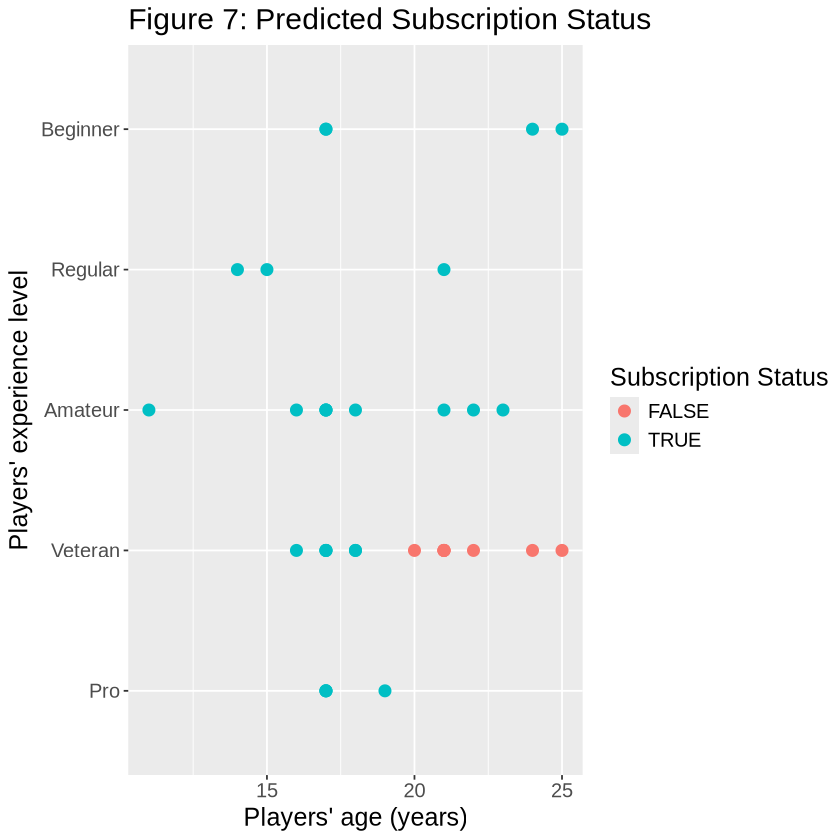

In [27]:
predicted_subscribe <- players_predictions |>
  ggplot(aes(x = Age, y = experience, color = .pred_class)) +
  geom_point(size = 3) +
  labs(
    x = "Players' age (years)",
    y = "Players' experience level",
    title = "Figure 7: Predicted Subscription Status",
    color = "Subscription Status"
  ) +
  theme(text = element_text(size = 15))
predicted_subscribe

Figure 8 shows the model's predicted subscription status for each player. We can see that many Beginner, Regular, and Amateur players are predicted to subscribe, while some Veteran players around ages 18–22 are predicted not to subscribe. Compared to Figure 7, we can observe that our model predicts players to be subscribed around ages 17, even though they are not actually subscribed. This is likely due to the large number of 17-year-olds in the dataset, combined with the class imbalance where most players are subscribed.

## Discussion


We used a K-NN classification model to evaluate if a player's subscription status (`subscribe`) could be predicted using the player's `Age` and `experience` as predictors. The model yielded an accuracy of 70.59%, which is a better prediction than randomly guessing subscription status among players which would yield 50%. Our model had precision and recall values of 80.77%, indicating a reasonable ability to correctly identify subscribed players. Since our question is evaluating the predictive power of age and experience, accuracy would be the most valuable metric. Accuracy measures the overall proportion of correct predictions of subscribcription status, making it comprehensive indicator of model performance and enough to answer our question. While precision and recall could show our model's ability to correctly identify subscribed players or minimize false positives, our primary goal is to see the general predictive ability of age and experience, not just one class. In our exploratory data analyses, we could see some correlation betweeen subscription status and age and experience, but those patterns also correlated with the overall imbalance of our data, where most players are teenagers and young adults, Amateurs and subscribed.

Although we got a relatively decent accuracy from our model, it is important to compare this performance to a baseline model. It was revealed in our analysis that approximately 77.06% of players were subscribed. A naive baseline model that predicts every player subscribes to the newsletter would have an accuracy around 77.06%. Our model's accuracy of 70.59% is slightly below the baseline, indicating that age and experience alone do not provide enough information to surpass the majority-class assumption.

One important factor that heavily impacted our model is class imbalance. The majority of players in the dataset were subscribed. This imbalance heavily biases the K-NN algorithm toward predicting the majority class much more frequently. As a result, the model tends to overpredict subscription for players, especially those with common ages or experience levels in the dataset, such as 17-year-olds or Amateur players. This makes it difficult for our model to distinguish patterns for the minority class, limiting its overall predictive power. A more balanced dataset or upsampling minority classes could potentially change the results of our findings and improve the performance of a K-NN classification model.

Overall, if we compared our model to a simple baseline model, the results suggest that `Age` and `experience` are not strong predictors of `subscribe`, indicating PLAI cannot target recruitment soley based on age and experience. However because our model was heavily influenced by class imbalance, it is difficult to fully conclude that this reflects the true predictive power experience and age with respect to subscription status.

Future questions that stem from our findings to further explore player subscriptions are:
- Would using a greater dataset change the results of our model?
- Are there other predictors such as `played_hours` that would have a greater predictive power of `subscribe`?
- Would using a different classification model other than K-NN improve the results of our model?

## References 
Pacific Laboratory of Artificial Intelligence. (2024). PLAICraft. Plaicraft.ai. https://plaicraft.ai/ \
GeeksforGeeks. (2023, August). Encoding Categorical Data in R. GeeksforGeeks. https://www.geeksforgeeks.org/r-language/encoding-categorical-data-in-r/